# Phase plotting

Generates line plot of phase distribution over different samples using preprocessed summary file. Plots mean +/- SD.

In [2]:
import os
import re
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from GEN_Utils import FileHandling
from loguru import logger
logger.info("Import OK")

2019-08-04 16:31:54,832 GEN_Utils.FileHandling: [INFO ]  Import ok
2019-08-04 16:31:54.845 | INFO     | __main__:<module>:10 - Import OK


# Set sample-specific variables

In [3]:
input_path = 'python/gauss_models/'
output_path = 'python/phase_plotting/'
plate_sample = ['TPE only', '1', '1.5', '2', '3', '4']*4

plate_cords = [f'{x}{y}' for x in string.ascii_uppercase[0:4]
               for y in range(1, 7)]

sample_map = dict(zip(plate_cords, plate_sample))

In [4]:
if not os.path.exists(output_path):
    os.mkdir(output_path)

# Read in summary df and preview

In [5]:
summary = pd.read_excel(f'{input_path}summary.xlsx')

In [6]:
summary.head()

,Unnamed: 0,sample,G,S,M
0,0,1A2,0.443085,0.224360,0.332555
1,1,1A3,0.459978,0.223902,0.316120
2,2,1A4,0.434106,0.227156,0.338738
3,3,1A5,0.489330,0.196186,0.314484
4,4,1A6,0.477267,0.232741,0.289992


# Assign sample-specific descriptors to summary table

In [7]:
summary['plate'] = summary['sample'].str[0]
summary['well'] = summary['sample'].str[1:]
summary['sample'] = summary['well'].map(sample_map)
phase_name = ['G', 'S', 'M']
phase_num = [1, 2, 3]
phase_map = dict(zip(phase_name, phase_num))

# Generate line-plot

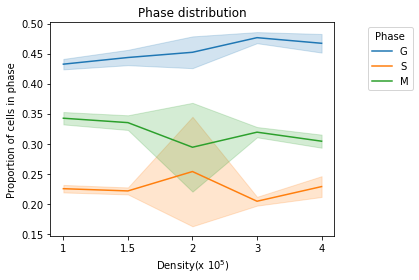

In [8]:
fig = plt.subplots()

for phase in phase_name:
    sns.lineplot(summary['sample'], summary[phase], label=phase, ci='sd')

plt.ylabel("Proportion of cells in phase")
plt.xlabel(r'Density(x 10$^ 5$)')
plt.title('Phase distribution')
plt.legend(bbox_to_anchor=(1.1, 1.0), title='Phase')
plt.tight_layout()
plt.autoscale()
plt.savefig(f'{output_path}line_plot.png')